# Analysis

## Imports and data


In [490]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV again, skipping the second header row
df = pd.read_csv("./data/results_all_cleaned.csv", skiprows=[1])

# Split dataset into groups
df_prolific = df[df["Q0_ProlificID"].notna()]
df_infodienst = df[df["Q0_ProlificID"].isna()]


## Setting

Q7
Other                    8.837209
Public space            14.418605
Workplace/University    34.883721
At home                 41.860465
Name: count, dtype: float64


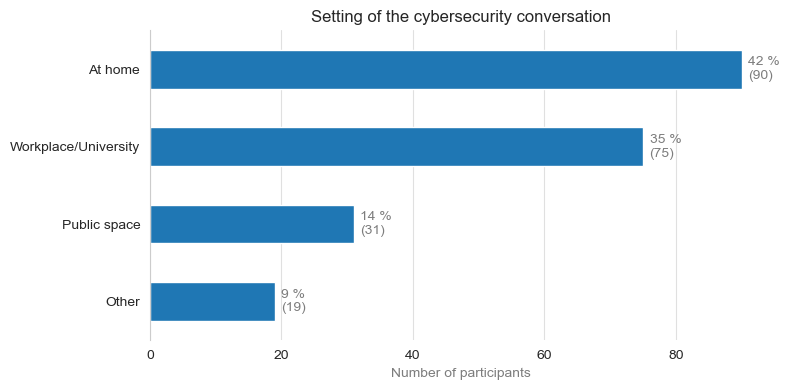

In [491]:
def process_and_plot(df, title):
    # Replace "Other (please specify)" with the free text where available
    df["Q7"] = df.apply(
        lambda row: row["Q7_4_TEXT"] if str(row["Q7"]).strip() == "Other (please specify)" and pd.notna(row["Q7_4_TEXT"])
        else row["Q7"],
        axis=1
    )

    q7_exploded = df.dropna(subset=["Q7"]).assign(
        Q7=df["Q7"].dropna().str.strip()
    ).explode("Q7")

    q7_exploded["Q7"] = q7_exploded["Q7"].replace(
        {"Public space (e.g., café, train)": "Public space"}
    )

    q7_exploded = q7_exploded[q7_exploded["Q7"] != "Other (please specify)"]

    # Values to combine into "Other"
    to_other = {"party", "online", "phone call", "chat", "doctor's office", "car"}
    q7_exploded["Q7"] = q7_exploded["Q7"].apply(
        lambda x: "Other" if x.strip().lower() in to_other else x
    )

    # Count the responses
    q7_counts_final = q7_exploded["Q7"].value_counts()
    q7_counts_final = q7_counts_final.sort_values(ascending=True)

    total_responses = q7_counts_final.sum()
    q7_percentages = (q7_counts_final / total_responses) * 100

    print(q7_percentages)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 4))
    bars = q7_counts_final.plot(kind="barh", ax=ax)

    ax.set_title(title)
    ax.set_xlabel("Number of participants", alpha=0.6)
    ax.set_ylabel("")
    ax.tick_params(axis='y', rotation=0)
    plt.grid(axis='x', alpha=0.6)
    ax.grid(axis='y', visible=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    for i in range(len(q7_counts_final)):
        count = q7_counts_final.iloc[i]
        percentage = q7_percentages.iloc[i]
        ax.text(count + 1, i, f'{percentage:.0f} %\n({count})', ha='left', va='center', fontsize=10, alpha=0.6)

    plt.tight_layout()
    plt.show()

process_and_plot(df, 'Setting of the cybersecurity conversation')


## Initiator

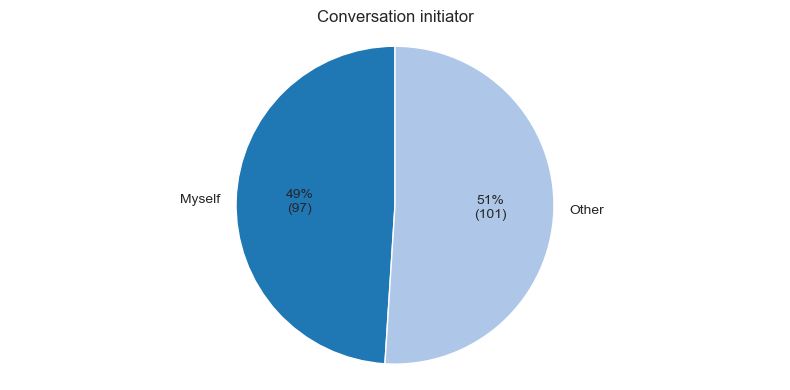

In [492]:
import pandas as pd
import matplotlib.pyplot as plt

def process_and_plot(df, title):
    q5_counts = df["Q5"].value_counts()

    q5_counts = q5_counts.sort_values(ascending=True)
    # Calculate the total number of responses
    total_responses = q5_counts.sum()

    # Calculate the percentage distribution
    q5_percentages = (q5_counts / total_responses) * 100

    # Define a custom color palette
    colors = plt.cm.tab20.colors  # You can choose any color palette from matplotlib

    # Plot
    fig, ax = plt.subplots(figsize=(8, 4))
    wedges, texts, autotexts = ax.pie(q5_counts, labels=q5_counts.index, autopct='%1.f%%', startangle=90, colors=colors)

    # Add absolute values to the pie chart
    for autotext, label in zip(autotexts, q5_counts.index):
        percentage_text = autotext.get_text()
        count = q5_counts[label]
        autotext.set_text(f'{percentage_text}\n({count})')

    ax.set_title(title)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.tight_layout()
    plt.show()

# Assuming df is already defined
process_and_plot(df, 'Conversation initiator')


## Trigger

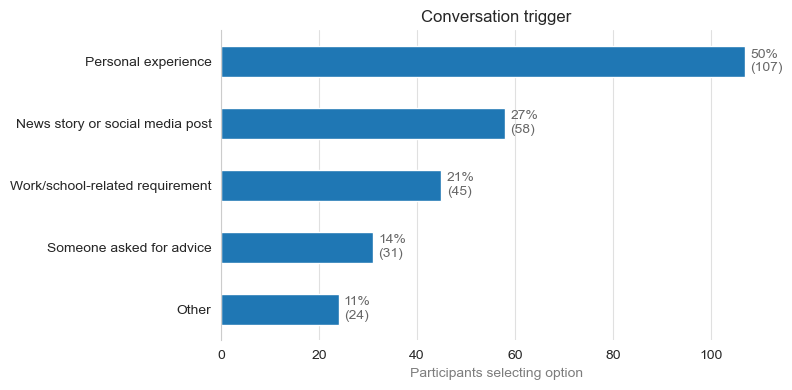

In [502]:
import matplotlib.pyplot as plt
import pandas as pd

def process_and_plot(df, title):
    # Keep only rows where Q8 was answered
    answered = df.loc[df["Q8"].notna()].copy()

    # Split multi-select answers and explode
    answered["Q8"] = (
        answered["Q8"].astype(str)
        .str.split(",")
    )
    q8_exploded = answered.explode("Q8")
    q8_exploded["Q8"] = q8_exploded["Q8"].str.strip()
    q8_exploded = q8_exploded[q8_exploded["Q8"] != ""]

    # Normalize labels
    q8_exploded["Q8"] = q8_exploded["Q8"].replace({
        "Other (please specify)": "Other",
        "Personal experience (e.g. cybersecurity incident)": "Personal experience"
    })

    # Count selections per option
    q8_counts = q8_exploded["Q8"].value_counts().sort_values(ascending=True)

    # Number of respondents who answered Q8 (denominator for %)
    n_respondents = answered.shape[0]

    # Percent of respondents selecting each option (can sum > 100%)
    q8_percent = (q8_counts / n_respondents) * 100

    # Plot
    fig, ax = plt.subplots(figsize=(8, 4))
    q8_counts.plot(kind="barh", ax=ax)

    ax.set_title(title)
    ax.set_xlabel("Participants selecting option", alpha=0.6)
    ax.set_ylabel("")
    ax.tick_params(axis='y', rotation=0)
    ax.grid(axis='x', alpha=0.6)
    ax.grid(axis='y', visible=False)
    for spine in ['top','right','bottom']:
        ax.spines[spine].set_visible(False)

    # Annotate bars with "% (count)"
    for i, (cat, count) in enumerate(q8_counts.items()):
        pct = q8_percent.loc[cat]
        ax.text(count + max(q8_counts)*0.01, i, f"{pct:.0f}%\n({count})",
                ha="left", va="center", fontsize=10, alpha=0.7)

    plt.tight_layout()
    plt.show()

# Example
process_and_plot(df, "Conversation trigger")
